<a href="https://colab.research.google.com/github/handetushar/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**''Bike sharing clicks into a higher gear''**

##Bike rental businesses give customers—who are often, but not necessarily, tourists—bicycles for a short period. Bikes are generally rented for a few hours to recreationally explore the locality. But the customer base might also consist of college students on campus or others who rent for practical reasons.
##City bike rentals are particularly popular among tourists who like to explore their destination by bicycle. Usually, the customers of these businesses are most interested in an efficient, comfortable, and safe way of commuting from one place to another. Depending on the destination, weather conditions or the business can be seasonal. However, due to very seasonal industry it can be negatively affected by environmental forecasts and various other variables.

##Bike sharing is increasingly attracting more riders in cities around the world for its benefits regarding the urban environment and public health.One critical issue that Seoul is currently facing is the serious air pollution levels. The city’s PM10 and PM2.5 levels maintained considerably high levels in the past few years.

#**''Go Green''**


# Importing dependencies

In [1]:
#Import the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, LabelEncoder , MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#**Data Warehousing**

In [2]:
#Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Projects/Supervised ML/SeoulBikeData.csv', encoding= 'unicode_escape')

In [4]:
#Display first five row
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Check the size of the dataset
df.shape

(8760, 14)

In [6]:
#Reviewing the variables
print('\033[1m Here are the features that will be scrutinized ahead: \033[0m \n ')
df.columns

 Here are the features that will be scrutinized ahead:  
 


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#**Data Inspection**

In [7]:
#Recall data
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


s we can see our data have **8760 instances** and **14 features**.

In [8]:
#Checking the number of unique values in columns.
n = df.nunique(axis=0)
  
print("\033[1mNo.of unique values in each column :\033[0m\n")
n

No.of unique values in each column :



Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

After checking unique values, we can observe that seasons, holiday, func_day are categorical columns among all features.

In [9]:
#Getting the number of unique values of some categorical variables with their counts.
for var in df.columns:
  if var in ['Holiday','Functioning Day','Seasons']:
    print(f'\033[1m\033[4mThe column {var} has unique values\033[0m:\n{df[var].value_counts()}')

The column Seasons has unique values:
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
The column Holiday has unique values:
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
The column Functioning Day has unique values:
Yes    8465
No      295
Name: Functioning Day, dtype: int64


# **Data Cleaning**
Data Cleaning is the process of finding and correcting the inaccurate/incorrect data that are present in the dataset. One such process needed is to do something about the values that are missing in the dataset. In real life, many datasets will have many missing values, so dealing with them is an important step.




**Duplicate entries can ruin the split between train, validation and test sets in cases where identical entries are not all in the same set. This can lead to biased performance estimates that will lead to disappointing models in production.**

In [10]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("\033[1mThe number of duplicate values in the data set is =\033[0m ",value)

The number of duplicate values in the data set is =  0


In [11]:
#Some details about the features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [12]:
#Check if there are some null values 
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **Why do you need to fill in the missing data?** Because most of the machine learning models that you want to use will provide an error if you pass NaN values into it. The easiest way is to just fill them up with 0, but this can reduce your model accuracy significantly.

* **Fortunately, as seen above, we do not have any Null/Missing values or duplicate values.**

#**Descriptive Statistics**

In [13]:
# Getting more information about variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [14]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


For calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame we use .describe(). It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

##Numbers when the facility for sharing bicycle rentals is not functioning day?

In [15]:
#Ploting Pivot table for the function day or not function day with respect to holiday or not holiday
pd.pivot_table(df, index=['Holiday', 'Functioning Day'], columns='Seasons', values='Rented Bike Count',
               aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

Seasons                     Autumn  Spring  Summer  Winter  TOTAL
Holiday    Functioning Day                                       
Holiday    No                 24.0     NaN     NaN     NaN     24
           Yes                96.0    72.0    48.0   192.0    408
No Holiday No                223.0    48.0     NaN     NaN    271
           Yes              1841.0  2088.0  2160.0  1968.0   8057
TOTAL                       2184.0  2208.0  2208.0  2160.0   8760

* In autumn, there are 24 records when that day is holiday but not functioning and 223 records when that day is Non Holiday and also not functioning day.

* In spring, there are 48 records when that day is work day but not functioning. In conclusion, demand for bike rentals declines on non-operational days, as was the case in the spring and autumn.

* When there is a functional day and not a holiday, the records are higher.

#**Exploratory Data Analysis (EDA)**

An EDA is a detailed analysis designed to reveal a data set's underlying structure. It is significant for a business because it identifies trends, patterns, and linkages that are not intuitively clear.

##**Univariate Analysis**

* Provides summary statistics for each field in the raw data set or summary only on one variable.

* The ultimate purpose of a Univariate analysis is to simply explain the data and look for patterns therein.

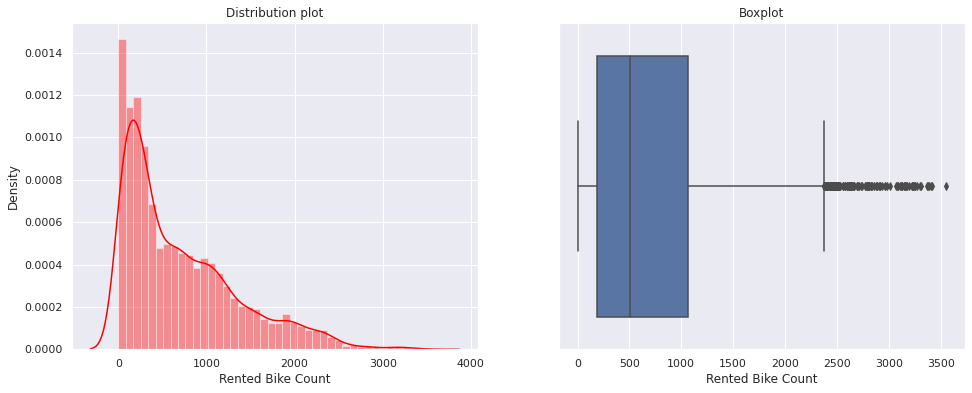

In [16]:
#Let us look at dependent feature
#DensityPlot
sns.set(rc={"figure.figsize": (16, 6)})
subplot(1,2,1)
sns.distplot(df['Rented Bike Count'], color='red')
plt.title('Distribution plot')
#Boxplot
subplot(1,2,2)
sns.boxplot(df['Rented Bike Count'])
plt.title('Boxplot');

Dependent feature is skewed right. We need to apply transformation to remove skewness.

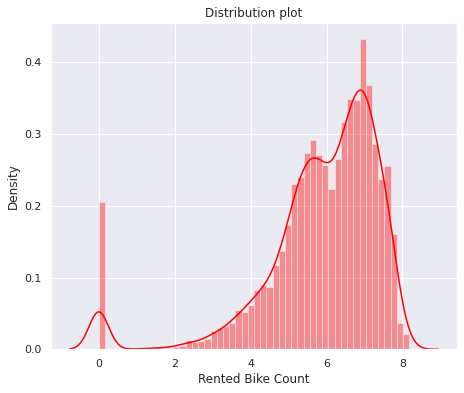

In [18]:
#Balancing the skewness using log transformation
# log1p is used instead of log10 to make value positive in array.
sns.set(rc={"figure.figsize": (16, 6)})
subplot(1,2,1)
sns.distplot(np.log1p(df['Rented Bike Count']), color='red')
plt.title('Distribution plot');

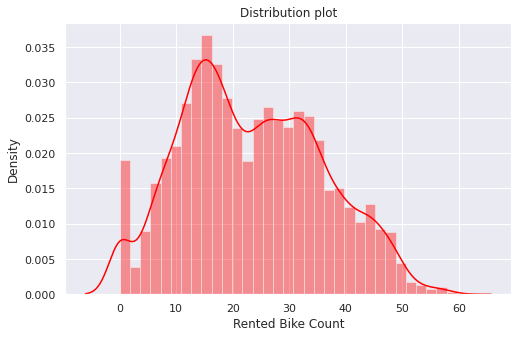

In [19]:
#Apply transformation
plt.figure(figsize=(8, 5))
sns.distplot(np.sqrt(df['Rented Bike Count']), color='red')
plt.title('Distribution plot');

**The square root transformation on the dependent variable gives us distribution which is almost normal in nature.**

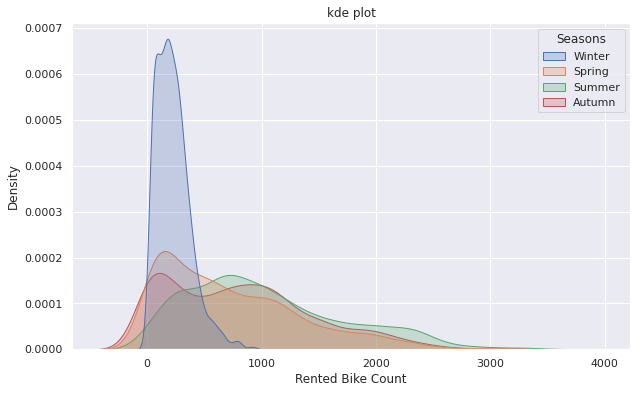

In [21]:
#kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Rented Bike Count', hue='Seasons', fill='True')
plt.title('kde plot');

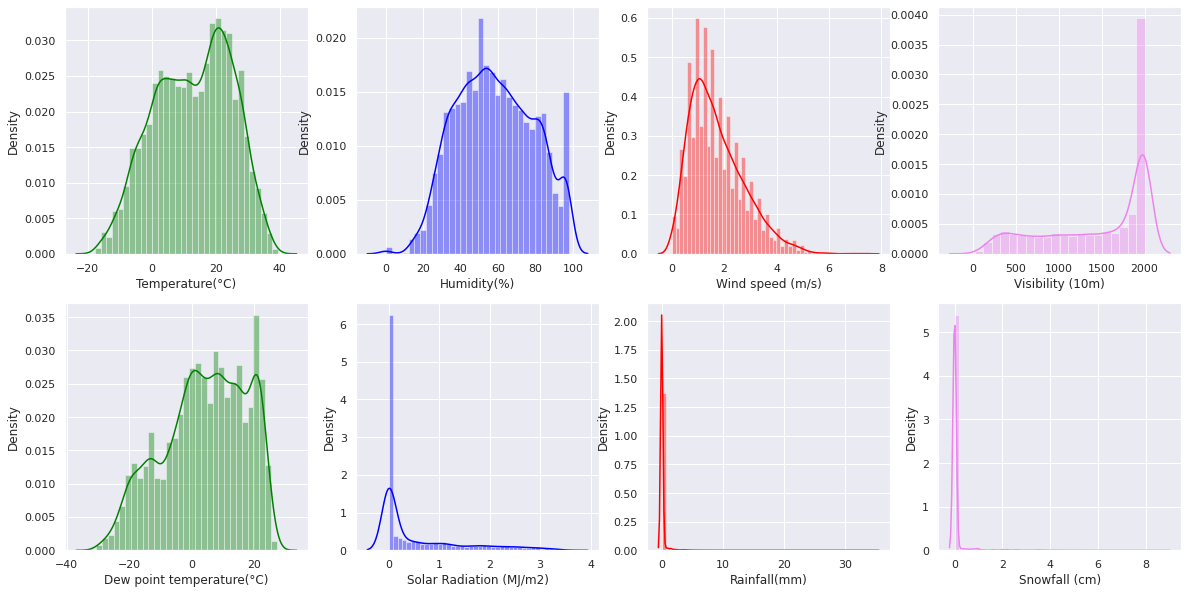

In [22]:
# display distribution of the independent features
sns.set(rc={"figure.figsize": (20, 10)})
subplot(2,4,1)
sns.distplot(df['Temperature(°C)'], color='green' )
subplot(2,4,2)
sns.distplot(df['Humidity(%)'], color='blue')
subplot(2,4,3)
sns.distplot(df['Wind speed (m/s)'], color='red')
subplot(2,4,4)
sns.distplot(df['Visibility (10m)'], color='violet')
subplot(2,4,5)
sns.distplot(df['Dew point temperature(°C)'], color='green' )
subplot(2,4,6)
sns.distplot(df['Solar Radiation (MJ/m2)'], color='blue')
subplot(2,4,7)
sns.distplot(df['Rainfall(mm)'], color='red')
subplot(2,4,8)
sns.distplot(df['Snowfall (cm)'], color='violet')

* We can see from the preceding distplots that **"Temperature"**, **"Dew point temperature"** and **"Humidity"** follow approximately normal distribution.
* The distribution of all other variables is either left- or right-skewed.

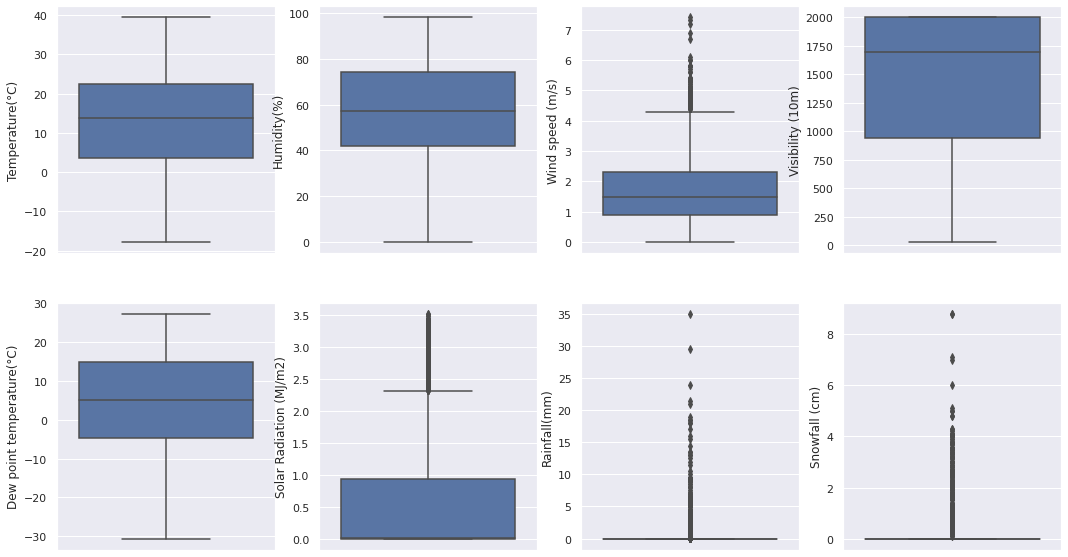

In [23]:
#Plotting boxplot for each independent variables
sns.set(rc={"figure.figsize": (18, 10)})
subplot(2,4,1)
sns.boxplot(y=df['Temperature(°C)'])
subplot(2,4,2)
sns.boxplot(y=df['Humidity(%)'])
subplot(2,4,3)
sns.boxplot(y=df['Wind speed (m/s)'])
subplot(2,4,4)
sns.boxplot(y=df['Visibility (10m)'])
subplot(2,4,5)
sns.boxplot(y=df['Dew point temperature(°C)'] )
subplot(2,4,6)
sns.boxplot(y=df['Solar Radiation (MJ/m2)'])
subplot(2,4,7)
sns.boxplot(y=df['Rainfall(mm)'])
subplot(2,4,8)
sns.boxplot(y=df['Snowfall (cm)'])

**We can see some outliers present in our dataset. We will rectify this in our analysis ahead.**

##**Bivariate Analysis**

It is performed to find the relationship between each variable in the dataset and the target variable of interest or using 2 variables and finding the relationship between them.

In [24]:
#Compare features with target variable.
comp_features = df[['Temperature(°C)','Dew point temperature(°C)','Humidity(%)','Hour','Seasons','Wind speed (m/s)','Visibility (10m)']]

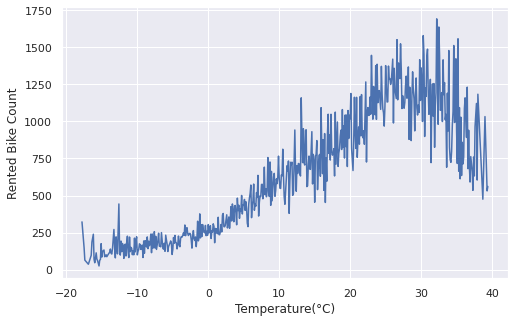

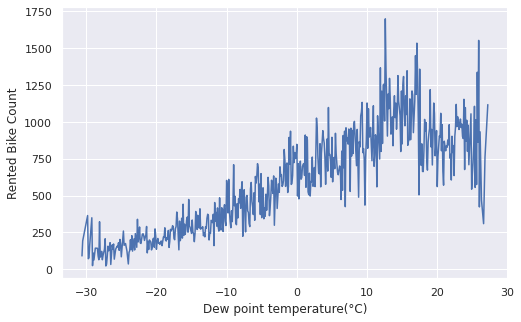

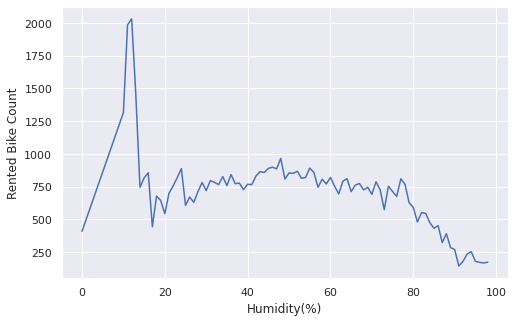

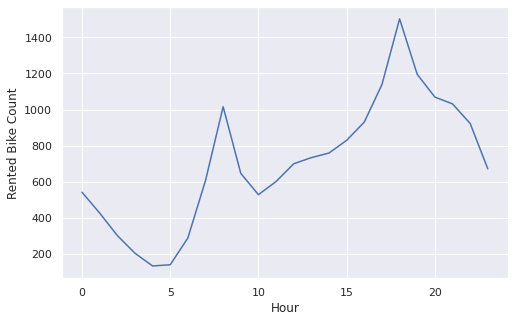

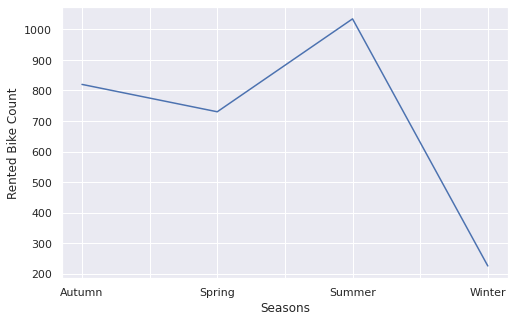

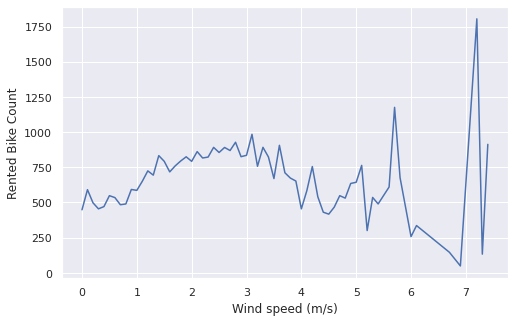

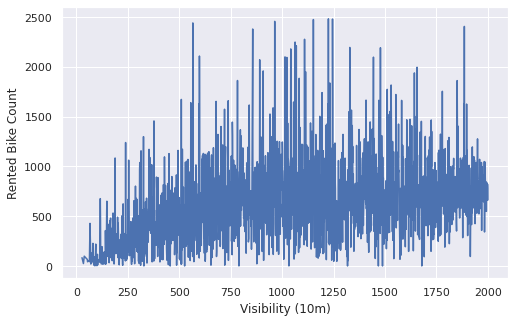

In [25]:
#Plots
for col in comp_features:
  plt.figure(figsize=(8,5))
  df.groupby(col).mean()['Rented Bike Count'].plot()
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
plt.show()

**Some of the following observations can be interpreted based on the above analysis:**

* The trend for bike rentals grows from temperature 20 to 30 degrees Celsius.

* The dew point temperature behaves similar to the temperature for the dependant variable.

* Lower humidity tends to increase demand for bike rentals.

* The bike usage is high in peak office hours that is 7-9 AM in morning and 6-8 PM in evening.

* People prefer to drive in the summer season when the wind is stronger.

#**Barplots**
Using barpot we can plot two or more attributes together and compare them.

In [26]:
# Convert date into day, month and year.
import datetime
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

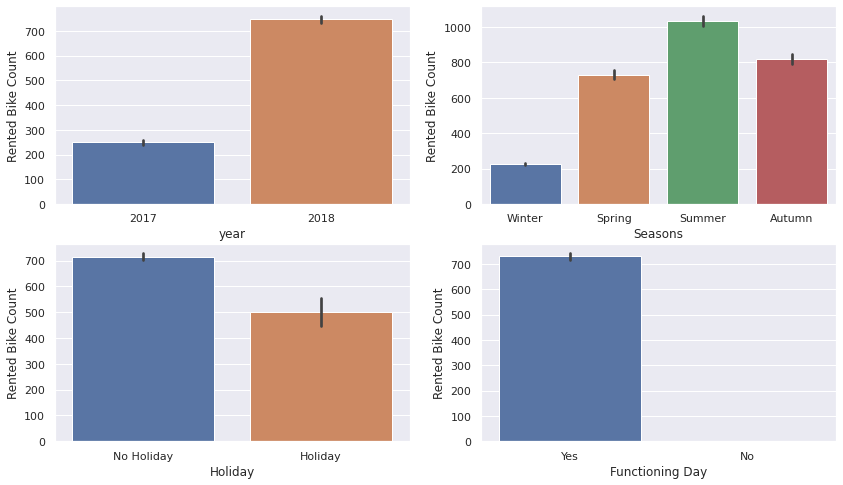

In [27]:
#Plotting bar
sns.set(rc={"figure.figsize": (14, 8)})
subplot(2,2,1)
sns.barplot(df['year'], y=df['Rented Bike Count'])
subplot(2,2,2)
sns.barplot(x=df['Seasons'],y=df['Rented Bike Count'])
subplot(2,2,3)
sns.barplot(x=df['Holiday'],y=df['Rented Bike Count'])
subplot(2,2,4)
sns.barplot(x=df['Functioning Day'],y=df['Rented Bike Count'])

#**Scatterplots**
Draw the scatterplot dependent and independent features and draw the bestfit line.

In [28]:
#List the columns with numerical values
numeric_features=[]
for i in df.columns:
  if df[i].dtype!='O':
    numeric_features.append(i)

numeric_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'year',
 'month',
 'day']

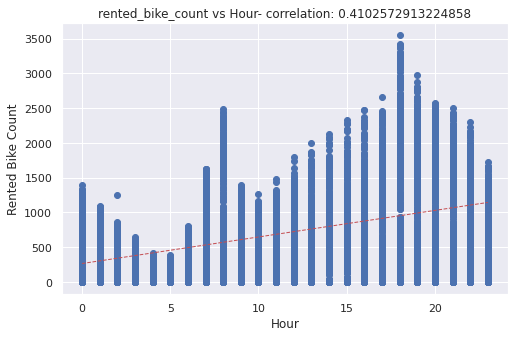

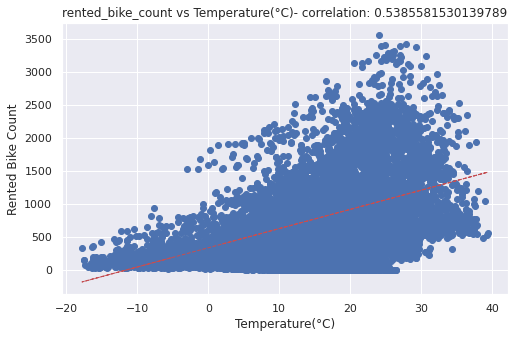

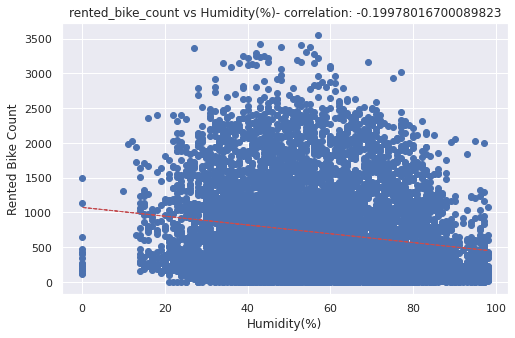

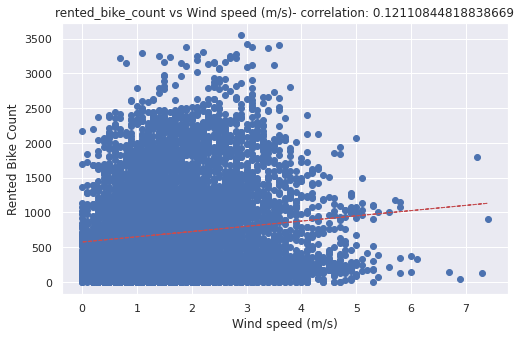

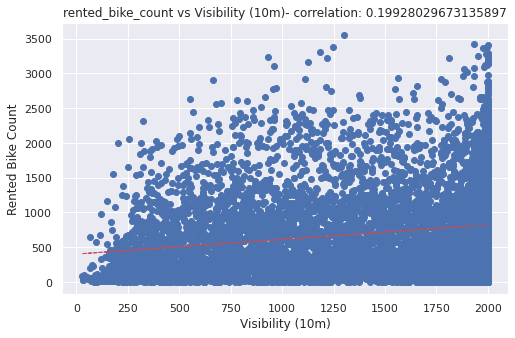

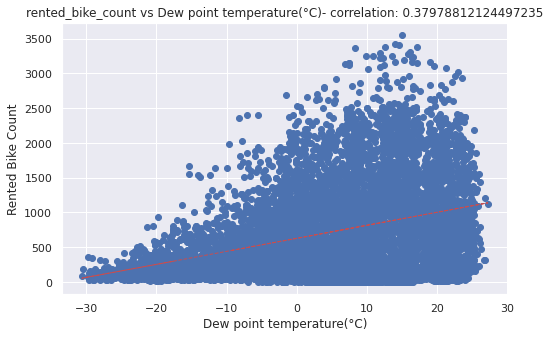

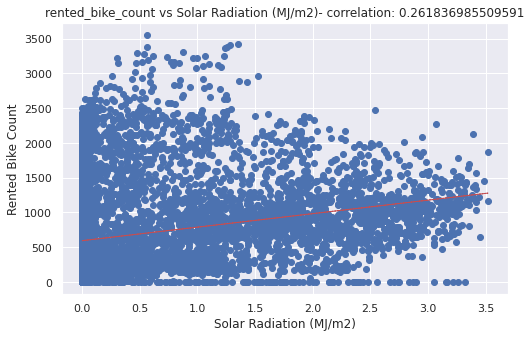

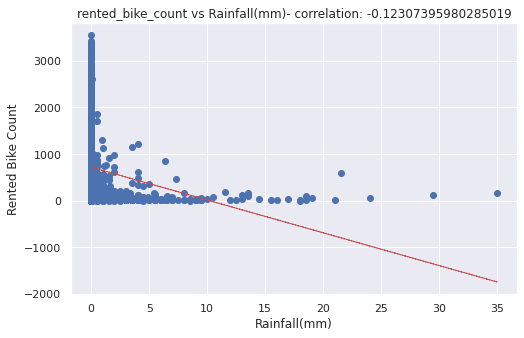

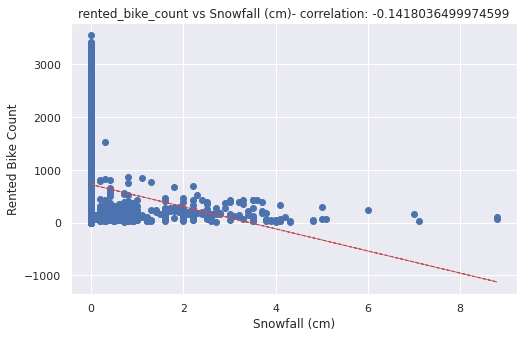

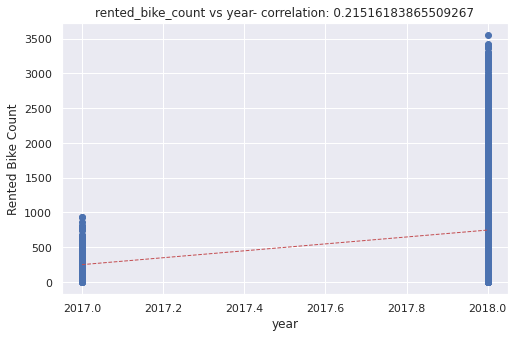

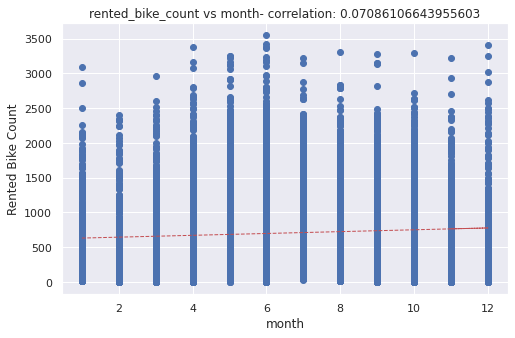

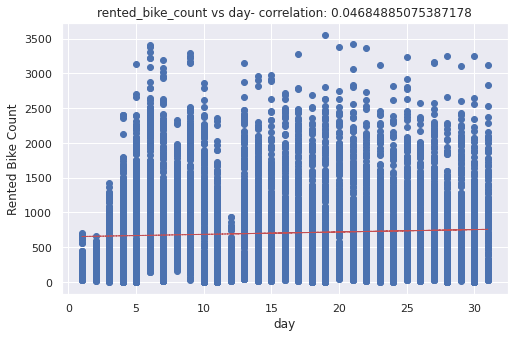

In [29]:
# plot scatter dataset correlation of rented bike data vs all numerical variables
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('rented_bike_count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

**We can identify the following insights using regression plot:**

*   Hour exhibits positive linearity with rented bike count, but it doesn't seems homoscadastic in nature.
*   The temperature feature has a little homoscadastic nature and is positively linear with the frequency of rented bikes.
*   Humidity, sun radiation, snowfall, and rainfall all show negative linearity with the target variable, indicating that in real-world conditions, individuals avoid riding bikes during snowfall, rain, and high humidity. 
*   Positive linearity of wind speed and visibility with rented bike count is somewhat intuitive, since higher wind speed and greater visibility tend to increase demand for rental bikes.
*   Month, Year, and Day have hardly any effect on our target variable.

#**Identifying Multicollinearity:**
A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

* Positive Correlation: both variables change in the same direction.
* Neutral Correlation: No relationship in the change of the variables.
* Negative Correlation: variables change in opposite directions.

The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. 

## **Heatmap**


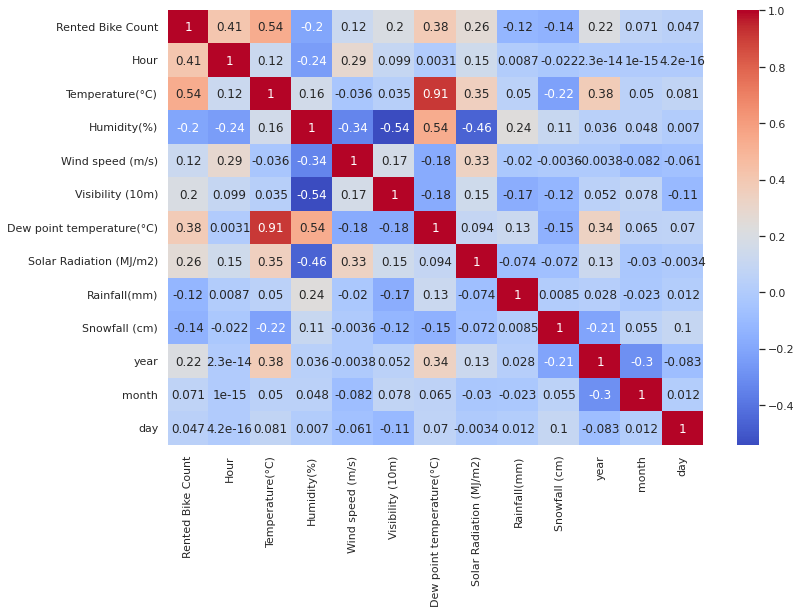

In [30]:
#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## **From above heatmap we can see that**
* Features are highly positively correlated with independent variable are Hour, Temperature, Dew point temperature. 
* Features are negatively correlated with independent features are Humidity, Rainfall, Snowfall.
*Dew point temp is highly correlated with temperature. 

#**Multicollinearity**
Multicollinearity can also be found by Variance inflation factor (VIF)

In [31]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year', 'month', 'day']]])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


Temprature and dew point temparature having high VIF lets drop dew point temperature, since both are linearly correlated with each other.

In [33]:
df=df.drop('Dew point temperature(°C)', axis=1)

In [34]:
#Again calculate VIF
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year', 'month', 'day']]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


## Handeling the outliers
Outliers can mislead the training process which results less accurate models and bad results.

In [35]:
#Collect all numericall features
numeric_features=df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'year', 'month', 'day'],
      dtype='object')

Drop the independent variable, hour, day, month and year from this list, since they dont have the outliers.

In [36]:
to_remove=['Rented Bike Count', 'Hour','year', 'month', 'day']
numeric_features=list(set(numeric_features)-set(to_remove))

In [37]:
#Removing the outliers
for i in numeric_features:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  df = df[df[i] <= (Q3+(1.5*IQR))]
  df = df[df[i] >= (Q1-(1.5*IQR))]

print(f'Initially there was 8760 value after removing outliers {df.shape[0]} values remains. ')

Initially there was 8760 value after removing outliers 7334 values remains. 


#Handling categorical features
We will convert categorical values into numerical values, for that we can use OneHot encoding or mapping to binary values.

In [38]:
#OneHot encoding
seasons_df=pd.get_dummies(df['Seasons'], prefix='seas', prefix_sep='_', drop_first='True')
holiday_df=pd.get_dummies(df['Holiday'], drop_first='True')
funday_df=pd.get_dummies(df['Functioning Day'], prefix='fun_day', drop_first='True')

In [39]:
new_df=pd.concat([df,seasons_df, holiday_df, funday_df], axis=1)

In [40]:
#drop categorical features now
new_df.drop(['Date', 'Seasons', 'Holiday','Functioning Day'],axis=1, inplace=True)

In [41]:
#Check the columns of the new dataframe.
new_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'year', 'month', 'day', 'seas_Spring',
       'seas_Summer', 'seas_Winter', 'No Holiday', 'fun_day_Yes'],
      dtype='object')

In [42]:
# Rename the columns in the proper format
new_df=new_df.rename(columns={'Rented Bike Count':'bike_count','Hour':'hours','Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                              'Wind speed (m/s)':'wind_speed', 'Visibility (10m)':'visibility','Solar Radiation (MJ/m2)':'solar_rad', 'Rainfall(mm)':'rainfall',
                              'Snowfall (cm)':'snowfall','No Holiday':'working_day','fun_day_Yes':'functioning_day' })

In [43]:
#Display first five rows
new_df.head()

,bike_count,hours,temp,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall,year,month,day,seas_Spring,seas_Summer,seas_Winter,working_day,functioning_day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,1,12,0,0,1,1,1


In [44]:
#Checking the shape of the dataset
new_df.shape

(7334, 17)

In [45]:
#Seperating independent and dependent values
X=new_df.drop('bike_count', axis=1)
#y=new_df['bike_count']
y=np.sqrt(new_df['bike_count'])

#Modeling

In [46]:
#Importing dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [47]:
#Seperating independent and dependent values
X=new_df.drop('bike_count', axis=1)
# Dependent feature was right skewed apply root transfomation to make it normal
y=np.sqrt(new_df['bike_count'])

In [48]:
#train_test_split
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=0)

In [49]:
# Check size of train and test set
print(X_train.shape, X_test.shape )

(5867, 16) (1467, 16)


In [50]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train

array([[ 0.77386902,  1.23999814, -0.48304658, ..., -0.55221166,
        -4.36163854,  0.19362063],
       [-0.2116813 ,  1.83643573, -0.48304658, ..., -0.55221166,
         0.22927163,  0.19362063],
       [ 1.05545483,  0.86830515,  0.05499649, ..., -0.55221166,
         0.22927163,  0.19362063],
       ...,
       [ 1.05545483, -0.6530429 , -1.45152412, ...,  1.81089981,
         0.22927163,  0.19362063],
       [-1.19723163, -0.27270589, -1.61293704, ..., -0.55221166,
         0.22927163,  0.19362063],
       [-0.35247421, -0.05660531, -1.50532843, ..., -0.55221166,
         0.22927163,  0.19362063]])

In [52]:
#Converting nd array to Dataframe
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df.head()

,hours,temp,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall,year,month,day,seas_Spring,seas_Summer,seas_Winter,working_day,functioning_day
0,0.773869,1.239998,-0.483047,1.137821,-0.690085,1.785912,0.0,0.0,0.282986,-0.167990,-1.084697,-0.574267,1.742147,-0.552212,-4.361639,0.193621
1,-0.211681,1.836436,-0.483047,0.923516,0.579297,2.221012,0.0,0.0,0.282986,-1.049563,-0.856001,-0.574267,1.742147,-0.552212,0.229272,0.193621
2,1.055455,0.868305,0.054996,0.816363,0.880302,0.140692,0.0,0.0,0.282986,1.595155,-1.084697,-0.574267,1.742147,-0.552212,0.229272,0.193621
3,-0.774853,0.617628,0.700648,-0.040856,0.352253,-0.661523,0.0,0.0,0.282986,0.125867,-0.741654,-0.574267,-0.574004,-0.552212,0.229272,0.193621
4,0.773869,1.542539,-1.236307,0.923516,0.266252,1.772316,0.0,0.0,0.282986,-0.167990,0.973565,-0.574267,1.742147,-0.552212,0.229272,0.193621


#Linear Regression

Linear Regression is used to perform regression task. It makes predictions for continuous/real or numeric variables. Since we converted all varibales into numeric values,lets try linear regression for prediction.

In [53]:
#Importing the model
from sklearn.linear_model import LinearRegression

#Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [54]:
# Predicting train and test
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [55]:
#Check the value of the intercept
regressor.intercept_

24.64391183072802

In [56]:
#Check the coeffiecients of variables
regressor.coef_

array([ 3.91420534e+00,  5.55880807e+00, -2.19298536e+00,  3.72029751e-01,
       -9.28092190e-02, -3.58703020e-01,  1.90125693e-15, -8.88178420e-16,
       -5.91561882e-01, -4.63027254e-03, -2.22262318e-01, -1.29384809e+00,
       -1.22954470e+00, -3.91648245e+00,  6.19992052e-01,  5.53223274e+00])

In [57]:
#Calculate the evaluation metrices
MSE_linear=mean_squared_error(y_test, y_pred)
print('Mean squared error is:', MSE_linear)

RMSE_linear=math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared erroris :', RMSE_linear)

r2_score_train=r2_score(y_train, y_pred_train)
print('r2 score for train set is', r2_score_train)

r2_linear=r2_score(y_test, y_pred)
print(f'r2 score for test set is',r2_linear )

Mean squared error is: 47.79189306171063
Root mean squared erroris : 6.913168091527258
r2 score for train set is 0.6701555355017144
r2 score for test set is 0.6740434628412093


In [58]:
# Compare actual values with predicted values
test_df = pd.DataFrame(y_test)
test_df['Predicted count']=y_pred
test_df.rename(columns = {'bike_count':'Actual Count'},inplace = True)
test_df.head()

,Actual Count,Predicted count
4676,47.707442,34.638030
5842,23.237900,36.231478
6006,24.779023,27.525074
1104,14.560220,7.348663
7677,40.224371,33.343502


#Ridge

In [59]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [60]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -50.86919061904464


In [61]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [62]:
MSE_ridge  = mean_squared_error((y_test), (y_pred_ridge))
print("Mean squared error is :" , MSE_ridge)

RMSE = np.sqrt(MSE_ridge)
print("Root mean squared error is :" ,RMSE)

r2_ridge = r2_score((y_test), (y_pred_ridge))
print("R2 score is :" ,r2_ridge)

Mean squared error is : 47.79100544558511
Root mean squared error is : 6.913103893735802
R2 score is : 0.674049516677123


In [63]:
test_df['Predicted count']=y_pred_ridge
test_df.rename(columns = {'bike_count':'Actual Count'},inplace = True)
test_df.head()

,Actual Count,Predicted count
4676,47.707442,34.638940
5842,23.237900,36.224259
6006,24.779023,27.523253
1104,14.560220,7.350397
7677,40.224371,33.330075


#ElasticNet


In [64]:
#Importing the model
from sklearn.linear_model import ElasticNet

#Preparing the model
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


In [65]:
#Fitting the values
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [66]:
#Predicting the values
y_pred_train_elastic=elastic_regressor.predict(X_train)
y_pred_elastic = elastic_regressor.predict(X_test)

In [67]:
#Check the best parameters
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -50.92945708734453


In [68]:
# Calculating the evaluation metrics
MSE_elasticnet = mean_squared_error(y_test, y_pred_elastic)
print("Mean sqaured error for test set is :" , MSE_elasticnet)

RMSE_elasticnet = np.sqrt(MSE_elasticnet)
print("Root mean squared for test set is :" ,RMSE_elasticnet)

r2_train=r2_score(y_train, y_pred_train_elastic)
print('R2 score for train set is', r2_train)

r2_elasticnet = r2_score(y_test, y_pred_elastic)
print("R2 score for test set is :" ,r2_elasticnet)

Mean sqaured error for test set is : 47.80460469869231
Root mean squared for test set is : 6.9140874089566084
R2 score for train set is 0.6701116186110228
R2 score for test set is : 0.6739567652674845


In [69]:
#Comapre actual values with predicted values
test_df['Predicted count']=y_pred_elastic
test_df.head()

,Actual Count,Predicted count
4676,47.707442,34.650755
5842,23.237900,36.234559
6006,24.779023,27.504072
1104,14.560220,7.341624
7677,40.224371,33.270370


Text(0.5, 1.0, 'Comparision of actual and predicted values')

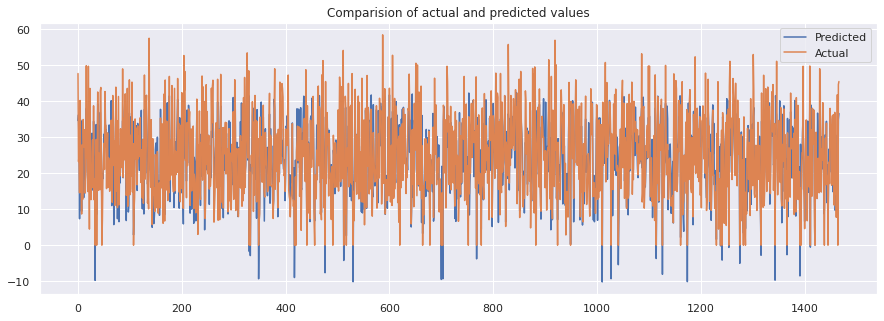

In [70]:
#Plotting actual and predicted values
plt.figure(figsize=(15,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Comparision of actual and predicted values')

#RandomForestRegressor

In [71]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

#Preparing the model
classifier = RandomForestRegressor(n_estimators=20, random_state=1) 


In [72]:
# Fit the object to train dataset
classifier.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=1)

In [73]:
#Predicting values
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [74]:
#Calculating metrices
MSE_random=mean_squared_error(y_test, test_preds)
RMSE_random=np.sqrt(mean_squared_error(y_test, test_preds))
r2_score_train=r2_score(y_train, train_preds)
r2_randomforest=r2_score(y_test, test_preds)

print('Mean Squared Error:',MSE_random )
print('Root Mean Squared Error:',RMSE_random )
print('r2 score for train set is:', r2_score_train)
print('r2 score for test set is:', r2_randomforest )

Mean Squared Error: 14.818808914852262
Root Mean Squared Error: 3.849520608446234
r2 score for train set is: 0.9839612032233108
r2 score for test set is: 0.8989308158924356


In [75]:
# Compare actual values with predicted values
test_df['Predicted count']=test_preds
test_df.head()

,Actual Count,Predicted count
4676,47.707442,45.651316
5842,23.237900,25.288995
6006,24.779023,23.727701
1104,14.560220,13.640780
7677,40.224371,36.637373


Text(0.5, 1.0, 'Comparision of actual and predicted values')

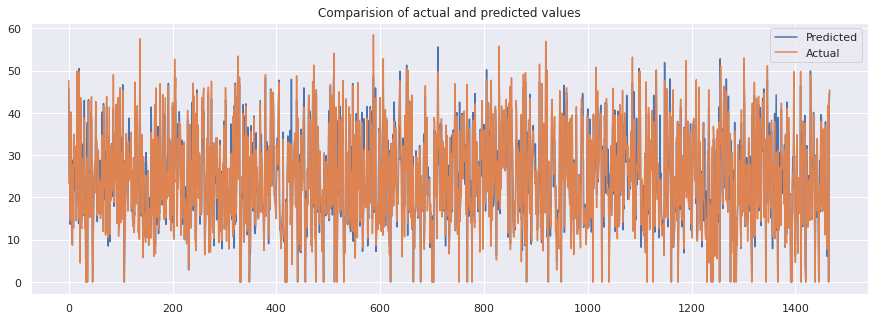

In [76]:
#Plotting actual and predicted value
plt.figure(figsize=(15,5))
plt.plot(test_preds)
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Comparision of actual and predicted values')

In [77]:
features = X_train_df.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

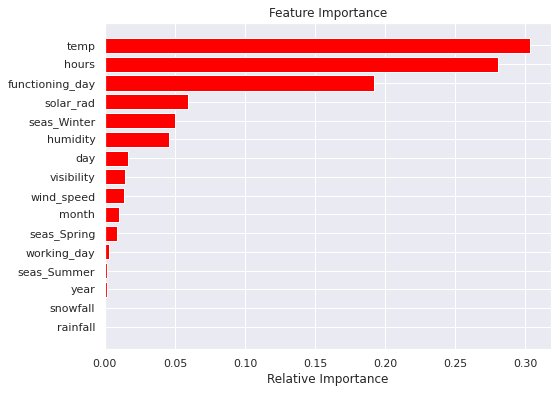

In [78]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

#Xgboost

In [79]:
#Prepairing the model
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(objective ='reg:linear',
                  n_estimators=70, max_depth=10, eta=0.08,subsample=0.8, reg_lambda=1.2, random_state=0)

#fitting the model
xgb_reg.fit(X_train, y_train)

[17:47:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.08, max_depth=10, n_estimators=70, reg_lambda=1.2,
             subsample=0.8)

In [80]:
#Predicting train score
xgb_train_score= xgb_reg.score(X_train, y_train)

In [81]:
#Predicting the test data.
y_pred_xgb = xgb_reg.predict(X_test)

In [82]:
MSE_xgb  = mean_squared_error((y_test), (y_pred_xgb))
RMSE_xgb = np.sqrt(MSE_xgb)
r2_score_xgb = r2_score((y_test), (y_pred_xgb))

print("Mean Squared Error:" , MSE_xgb)
print("Root Mean Squared Error:" ,RMSE_xgb)
print('r2 score for train set is', xgb_train_score)
print("r2 score for test set is" ,r2_score_xgb)
print('Adjusted r2', (1-(1-r2_score((y_test), (y_pred_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

Mean Squared Error: 12.62590922627368
Root Mean Squared Error: 3.553295544459211
r2 score for train set is 0.9909186969464271
r2 score for test set is 0.9138871179561079
Adjusted r2 91.29369068438994


In [83]:
# Compare actual values with predicted values
test_df['Predicted count']=y_pred_xgb
test_df.head()

,Actual Count,Predicted count
4676,47.707442,48.114971
5842,23.237900,25.157782
6006,24.779023,25.402147
1104,14.560220,15.077515
7677,40.224371,36.975273


Text(0.5, 1.0, 'Comparision of actual and predicted values')

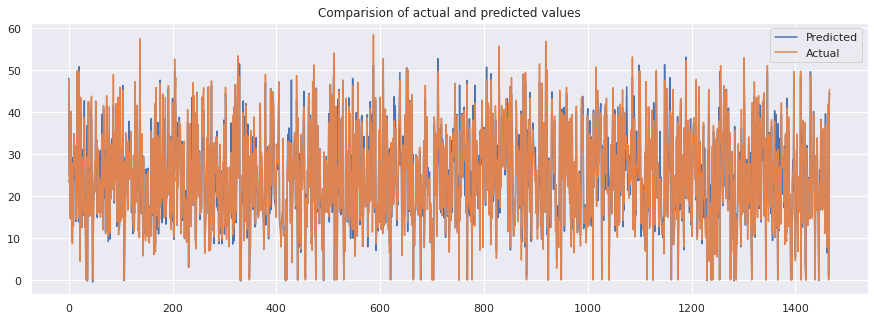

In [84]:
#Plotting actual and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_pred_xgb)
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Comparision of actual and predicted values')

In [85]:
# Plotting important features
importances = xgb_reg.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

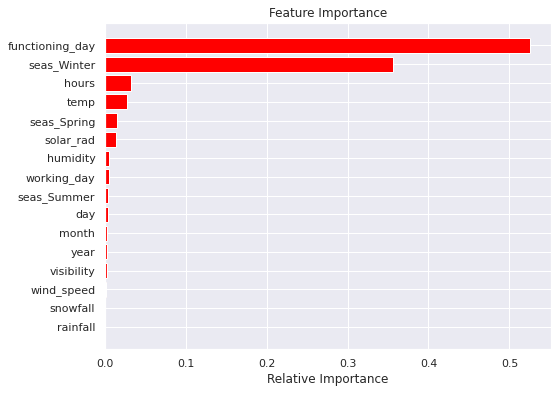

In [86]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

Top most imporatant fatures are winter season followed by functioning day and hours.

## Comparing r2 scores of all models together
Comparing r2 scores of all models together so we can compare performence of each model.

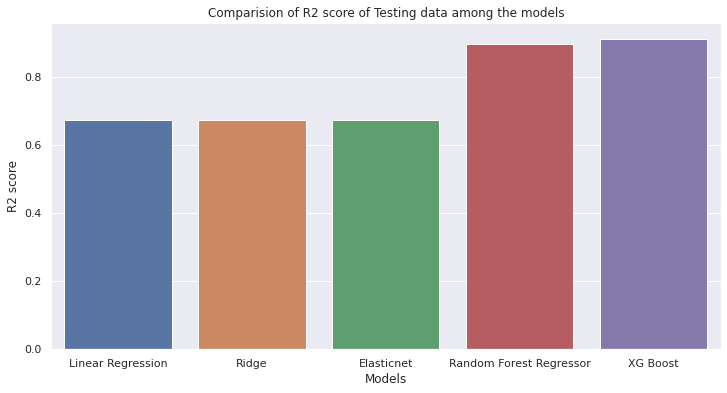

In [87]:
#Plotting the r2 score
models = ['Linear Regression','Ridge','Elasticnet' ,'Random Forest Regressor','XG Boost']
r2_scores= [r2_linear, r2_ridge, r2_elasticnet, r2_randomforest, r2_score_xgb]
plt.figure(figsize=(12,6))

plt.ylabel("R2 score")
plt.xlabel("Models")
sns.barplot(x= models, y=r2_scores)
plt.title('Comparision of R2 score of Testing data among the models')
plt.show()

In [88]:
df_r2=pd.DataFrame(r2_scores, index=models, columns=['r2_score'])
df_r2

,r2_score
Linear Regression,0.674043
Ridge,0.674050
Elasticnet,0.673957
Random Forest Regressor,0.898931
XG Boost,0.913887


#Conclusion